<a href="https://colab.research.google.com/github/SchneiderJs/Alzheimer-s-Classifier/blob/main/AlzheimerIdentificationDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Acadêmicos: Gabriel Schneider de Jesus, Gabriel Luís Fernando de Souza e Luciane Tedesco

# Doença de Alzheimer

O Alzheimer afeta cada pessoa de uma forma diferente, dependendo do impacto da doença e a personalidade da pessoa antes de ficar doente. Os sinais e sintomas ligados ao Alzheimer podem ser entendidos em três estágios.


**Estágio inicial:** são muitas vezes ignorados por serem confundidos com “sintomas de velhice” os sintomas desse estágio são:

*	Esquecimento.
*	perder a noção de tempo.
*	ficar perdido em locais conhecidos.

**Estágio intermediário:** conforme vai progredindo, os sintomas vão ficando mais evidentes e mais restritivos, estão inclusos:

*	Ficar esquecido de eventos recentes e do nome das pessoas.
*	Ficar perdido dentro de casa.
*	Ter uma crescente dificuldade na comunicação.
*	Precisar de atenção médica.
*	Experenciar mudanças de comportamento incluindo ficar andando de um lado para o outro e fazer perguntas repetitivas.

**Estágio tardio:** nesse estágio a dependência e inatividade é total, os distúrbios na mente são sérios e os distúrbios físicos ficam mais evidentes, estão inclusos nesses sintomas:

*	perder completamente a noção de tempo e espaço.
*	 ter dificuldade em reconhecer amigos e familiares.
*	Tem uma maior dependência médica para cuidados pessoais.
*	Ter dificuldade para andar.
*	Experenciar mudanças de comportamentos que podem até escalar para agressão.

# Prevendo a doença de Alzheimer

O aprendizado de máquina é amplamente utilizado na área da saúde. Neste trabalho propormos a construção de um modelo utilizando redes convolucionais para determinar se um paciente possui Alzheimer a partir de suas imagens de ressonância magnética.

## Conjunto de dados:

O conjunto de dados consiste em cerca em 6.336 imagens de ressonância magnética. Na qual, apresentam a fase inicial e avançada da doença de Alzheimer, e imagens que não apresentam a doença.
O conjunto de treino e teste está dividido da seguinte forma:

|Sem Alzheimer             |Treino|Teste|
|--------------------------|:-------------:|:-------------:|
|Sem Alzheimer             |	2560 imagens | 640 imagens |
|Fase inicial do Alzheimer |	717 imagens	 | 179 imagens |
|Fase avançada do Alzheimer|	1792 imagens | 448 imagens |

Abaixo são apresentados alguns exemplos:

|Sem Alzheimer             |Fase Inicial do Alzheimer|Fase avançada do Alzheimer|
|--------------------------|:-------------:|:-------------:|
|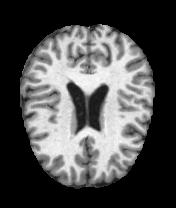|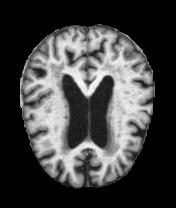|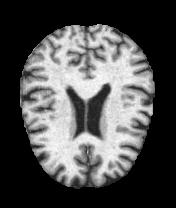|




#### Reading the Data

In [1]:
import numpy as np
from skimage.io import imread_collection

# dataset base folder
base_folder = 'data/Alzheimer_s Dataset/'

# test folders
test_folder_negative = base_folder + 'test/NonDemented/*.jpg'
test_folder_positive = base_folder + 'test/VeryMildDemented/*.jpg'

# train folders
train_folder_negative = base_folder + 'train/NonDemented/*.jpg'
train_folder_positive = base_folder + 'train/VeryMildDemented/*.jpg'

# reading the data
test_negative  = np.array(imread_collection(test_folder_negative))
test_positive  = np.array(imread_collection(test_folder_positive))
train_negative = np.array(imread_collection(train_folder_negative))
train_positive = np.array(imread_collection(train_folder_positive))

# showing the data shapes
print('test_negative: ' + str(test_negative.shape))
print('test_positive: ' + str(test_positive.shape))
print('train_negative:' + str(train_negative.shape))
print('train_positive:' + str(train_positive.shape))

test_negative: (640, 208, 176)
test_positive: (448, 208, 176)
train_negative:(2560, 208, 176)
train_positive:(1792, 208, 176)


#### Creating ours inputs and outputs

In [2]:
# creates a np array for positive and negative labels
y_test_negative = np.zeros((test_negative.shape[0], 1))
y_test_positive = np.ones((test_positive.shape[0], 1))

y_train_negative = np.zeros((train_negative.shape[0], 1))
y_train_positive = np.ones((train_positive.shape[0], 1))

# concatenate the np arrays - inputs and outputs
y_test = np.concatenate((y_test_negative, y_test_positive))
X_test = np.concatenate((test_negative, test_positive))

y_train = np.concatenate((y_train_negative, y_train_positive))
X_train = np.concatenate((train_negative, train_positive))

##### Shuffling the samples

In [52]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train, random_state=0)
X_test, y_test = shuffle(X_test, y_test, random_state=0)

##### Reshaping the data

In [4]:
input_shape = (test_negative.shape[1], test_negative.shape[2], 1)
print(input_shape)
print(X_train.shape)
print(X_test.shape)

(208, 176, 1)
(4352, 208, 176)
(1088, 208, 176)


In [5]:
images_train = np.reshape(X_train, (4352, 208, 176, 1))
images_test  = np.reshape(X_test, (1088, 208, 176, 1))
print(images_train.shape)

(4352, 208, 176, 1)


#### Creating the Neural Network

In [206]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, MaxPool2D, Dense, Dropout, Flatten
from keras.layers import SeparableConv2D

def add_conv_block(model, filters):
    
    model.add(SeparableConv2D(filters, 7, activation='relu', padding='same'))
    model.add(SeparableConv2D(filters, 3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D())
    
    
def add_dense_block(model, units, dropout_rate):
    
    model.add(Dense(units, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    
model = Sequential()

# Start
model.add(Conv2D(16, 3, activation='relu', padding='same', input_shape=input_shape, data_format="channels_last"))
model.add(Conv2D(16, 3, activation='relu', padding='same'))
model.add(MaxPool2D())

# Conv blocks
add_conv_block(model, 3)

model.add(Dropout(0.2))
model.add(Flatten())

# Dense blocks
add_dense_block(model, 32, 0.2)

# Softmax activation
model.add(Dense(1, activation='relu'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_74 (Conv2D)           (None, 208, 176, 16)      160       
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 208, 176, 16)      2320      
_________________________________________________________________
max_pooling2d_79 (MaxPooling (None, 104, 88, 16)       0         
_________________________________________________________________
separable_conv2d_76 (Separab (None, 104, 88, 3)        835       
_________________________________________________________________
separable_conv2d_77 (Separab (None, 104, 88, 3)        39        
_________________________________________________________________
batch_normalization_83 (Batc (None, 104, 88, 3)        12        
_________________________________________________________________
max_pooling2d_80 (MaxPooling (None, 52, 44, 3)         0         
__________

##### Training the Neural Network

In [207]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [208]:
model.fit(images_train, y_train, validation_split=0.15, epochs=5)

Train on 3699 samples, validate on 653 samples
Epoch 1/5
3699/3699 [==============================] - 27s 7ms/step - loss: 5.8231 - acc: 0.4709 - val_loss: 6.7632 - val_acc: 0.5804
Epoch 2/5
3699/3699 [==============================] - 19s 5ms/step - loss: 5.4378 - acc: 0.4977 - val_loss: 6.6510 - val_acc: 0.5743
Epoch 3/5
3699/3699 [==============================] - 20s 5ms/step - loss: 5.4279 - acc: 0.4847 - val_loss: 6.7632 - val_acc: 0.5804
Epoch 4/5
3699/3699 [==============================] - 20s 5ms/step - loss: 5.7359 - acc: 0.4793 - val_loss: 6.7682 - val_acc: 0.5773
Epoch 5/5
3699/3699 [==============================] - 20s 5ms/step - loss: 5.5726 - acc: 0.4918 - val_loss: 6.4990 - val_acc: 0.5681


##### Evaluating the predictions

In [209]:
results = []
for im in images_test:
    if model.predict(im.reshape(1, 208, 176, 1))[0][0] > 0:
        results.append(1)
    else:
        results.append(0)

results = np.array(results)

y_test_int = []
for y in y_test:
    y_test_int.append(int(y[0]))

y_test_int = np.array(y_test_int)

In [216]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test_int, results)
print("Test Score: {:.2f}".format(score * 100))

Test Score: 61.40
